In [30]:
# Importing necessary libraries
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow
#from sklearn.preprocessing import LabelEncoder
#from tensorflow.python.keras import utils
#from keras.models import Sequential
#from keras.layers import Dense, Flatten, InputLayer
#import keras
#import imageio # To read images
#from PIL import Image # For image resizing 
import cv2
import imghdr

In [2]:
data_dir = r'D:\Documents\CSE-code\python\Tuberculosis Detection system\TB_Chest_Radiography_Database' 
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [3]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            os.remove(image_path)

In [4]:
import numpy as np
from matplotlib import pyplot as plt

data = tensorflow.keras.utils.image_dataset_from_directory(data_dir)
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()

Found 4158 files belonging to 2 classes.


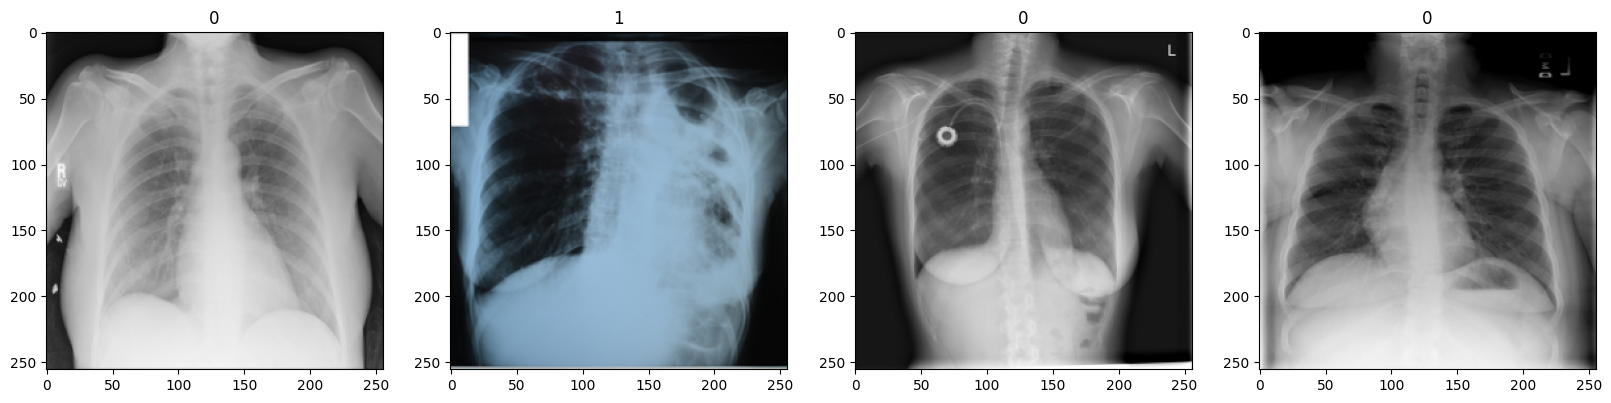

In [5]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [6]:
data = data.map(lambda x,y: (x/255, y))

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [7]:
data.as_numpy_iterator().next()

(array([[[[0.17254902, 0.17254902, 0.17254902],
          [0.10686275, 0.10686275, 0.10686275],
          [0.06176471, 0.06176471, 0.06176471],
          ...,
          [0.51960784, 0.51960784, 0.51960784],
          [0.5235294 , 0.5235294 , 0.5235294 ],
          [0.5323529 , 0.5323529 , 0.5323529 ]],
 
         [[0.16666667, 0.16666667, 0.16666667],
          [0.10392157, 0.10392157, 0.10392157],
          [0.05686275, 0.05686275, 0.05686275],
          ...,
          [0.35882354, 0.35882354, 0.35882354],
          [0.37156862, 0.37156862, 0.37156862],
          [0.40098038, 0.40098038, 0.40098038]],
 
         [[0.16470589, 0.16470589, 0.16470589],
          [0.10098039, 0.10098039, 0.10098039],
          [0.05588235, 0.05588235, 0.05588235],
          ...,
          [0.21764706, 0.21764706, 0.21764706],
          [0.2245098 , 0.2245098 , 0.2245098 ],
          [0.24803922, 0.24803922, 0.24803922]],
 
         ...,
 
         [[0.        , 0.        , 0.        ],
          [0.     

In [8]:
data

<MapDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [9]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [10]:
val_size

26

In [11]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [12]:
train

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [14]:
model = Sequential()
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [15]:
model.compile('adam', loss=tensorflow.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

In [17]:
tensorboard_callback = tensorflow.keras.callbacks.TensorBoard(log_dir='logs')

In [18]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
91/91 [==============================] - 49s 535ms/step - loss: 0.2718 - accuracy: 0.8942 - val_loss: 0.1358 - val_accuracy: 0.9591
Epoch 2/20
91/91 [==============================] - 77s 833ms/step - loss: 0.1175 - accuracy: 0.9557 - val_loss: 0.1009 - val_accuracy: 0.9651
Epoch 3/20
91/91 [==============================] - 78s 851ms/step - loss: 0.0799 - accuracy: 0.9712 - val_loss: 0.0869 - val_accuracy: 0.9712
Epoch 4/20
91/91 [==============================] - 80s 872ms/step - loss: 0.0572 - accuracy: 0.9791 - val_loss: 0.0903 - val_accuracy: 0.9615
Epoch 5/20
91/91 [==============================] - 79s 857ms/step - loss: 0.0370 - accuracy: 0.9863 - val_loss: 0.0650 - val_accuracy: 0.9844
Epoch 6/20
91/91 [==============================] - 78s 847ms/step - loss: 0.0366 - accuracy: 0.9876 - val_loss: 0.0720 - val_accuracy: 0.9832
Epoch 7/20
91/91 [==============================] - 82s 884ms/step - loss: 0.0556 - accuracy: 0.9804 - val_loss: 0.0787 - val_accuracy: 0.9784

In [19]:
# Saving Keras Artificial Neural Network model 
model.save("model.h5")

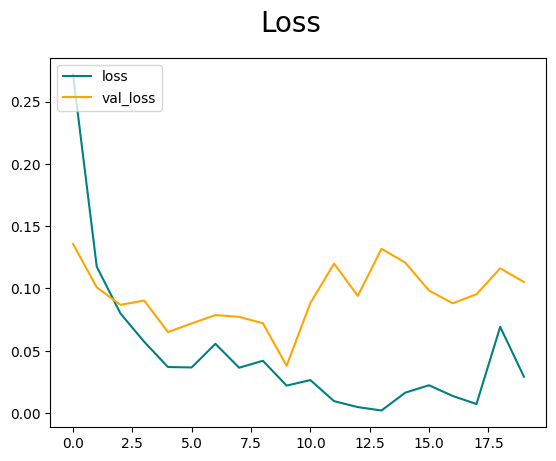

In [20]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

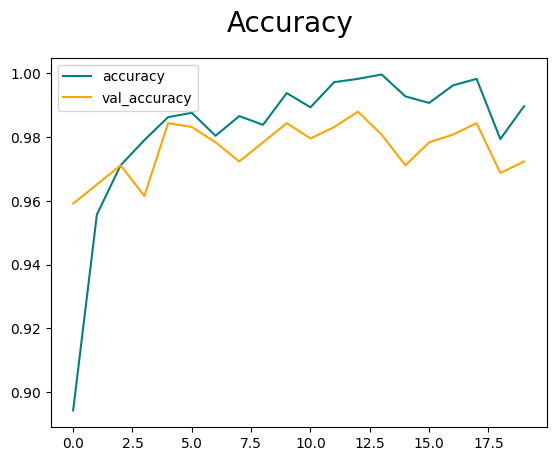

In [21]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [22]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [23]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [24]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 101ms/step


In [25]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.90789473, shape=(), dtype=float32) tf.Tensor(0.9324324, shape=(), dtype=float32) tf.Tensor(0.9710145, shape=(), dtype=float32)


In [26]:
import cv2

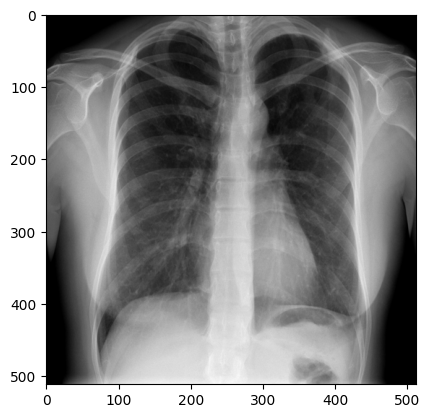

In [27]:
img = cv2.imread(r'D:\Documents\CSE-code\python\Tuberculosis Detection system\TB_Chest_Radiography_Database\Normal\Normal-4.png')
plt.imshow(img)
plt.show()

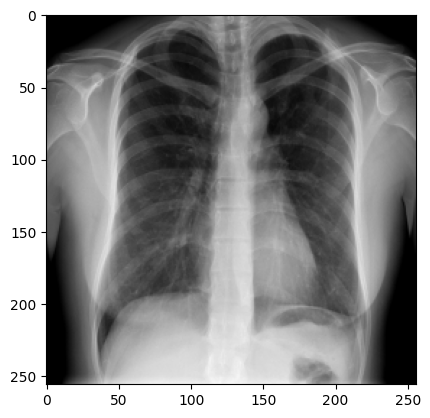

In [31]:
resize = tensorflow.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [32]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 20ms/step


In [33]:
yhat

array([[0.55844843]], dtype=float32)

In [34]:
if yhat < 0.5: 
    print(f'Predicted class is Normal')
else:
    print(f'Predicted class is TB')

Predicted class is TB
